<a href="https://colab.research.google.com/github/ArunVignesh75/Machine-Learning/blob/main/Customer_segmentation(K-Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation using K-Means

#Dataset Description:

  A company that sells some of the product, and you want to know how well does the selling performance of the product. You have the data that can we analyze, but what kind of analysis that we can do? Well, we can segment customers based on their buying behavior on the market.
Keep in mind that the data is really huge, and we can not analyze it using our bare eyes. We will use machine learning algorithms and the power of computing for it.

This project will show you how to cluster customers on segments based on their behavior using the K-Means algorithm in Python.
I hope that this project will help you on how to do customer segmentation step-by-step from preparing the data to cluster it.

#Contents:
1.Import necessary Packages

2.Load the Dataset

3.Pre-Processing the Data

4.Data Visualiation

5.Data Normalization

6.Initializing the Model

7.Silhouette Score

#Importing nescessary Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#Loading the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data-2.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Pre-Processing the Data

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#Data Visualization

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

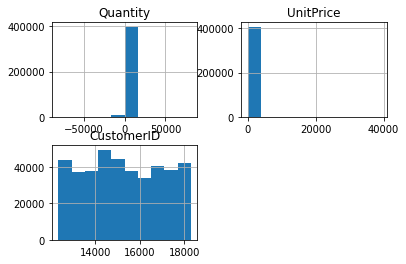

In [ ]:
df.hist()

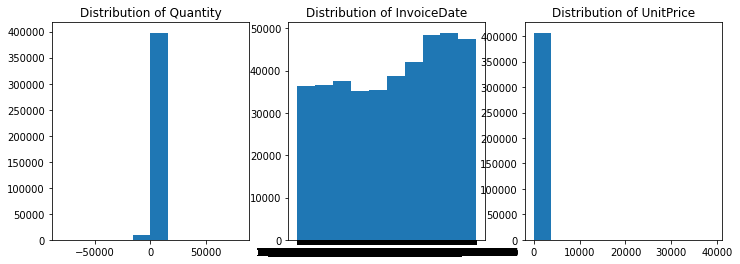

In [ ]:
# Create histograms of Quantity, InvoiceDate, and UnitPrice
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(df['Quantity'])
axs[0].set_title('Distribution of Quantity')
axs[1].hist(df['InvoiceDate'])
axs[1].set_title('Distribution of InvoiceDate')
axs[2].hist(df['UnitPrice'])
axs[2].set_title('Distribution of UnitPrice')
plt.show()


Heat Map Visualization

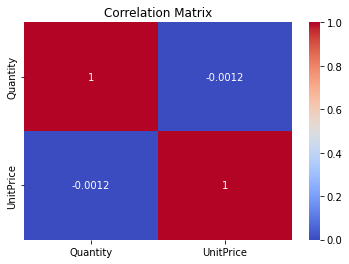

In [ ]:
# Create a correlation matrix
corr = df[['Quantity', 'InvoiceDate', 'UnitPrice']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<ipython-input-16-4ffe19d44158>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convert InvoiceDate to datetime format


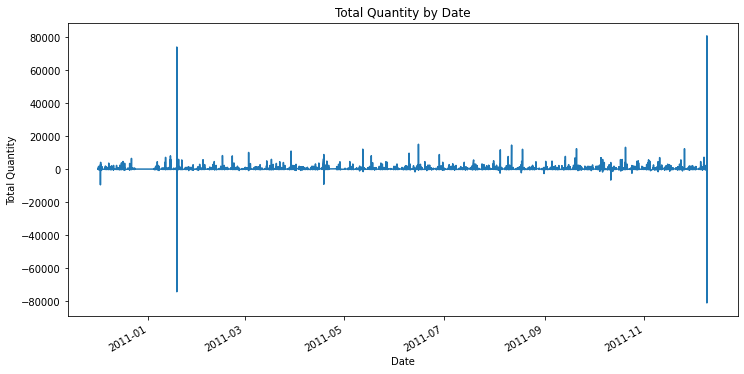

In [ ]:
# Create a time series plot of the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convert InvoiceDate to datetime format
ts = df.groupby('InvoiceDate')['Quantity'].sum()
ts.plot(figsize=(12, 6))
plt.title('Total Quantity by Date')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()


In [ ]:
# Preprocess the InvoiceDate column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = (df['InvoiceDate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

<ipython-input-17-f51ddb1572b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-17-f51ddb1572b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = (df['InvoiceDate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


#Data Normalization

In [ ]:
# Select the numerical features to be standardized
num_features = ['Quantity', 'UnitPrice','InvoiceDate']
X = df[num_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)


#Initializing the Model

In [ ]:
#Create a k-means clustering model with k=3 clusters
kmeans = KMeans(n_clusters=3)

In [ ]:
#Fit the model to the standardized data
kmeans.fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#Get the cluster assignments for each data point
labels = kmeans.labels_

In [ ]:
#Get the centroids of the clusters
centroids = kmeans.cluster_centers_

#Visualizing the Clusters

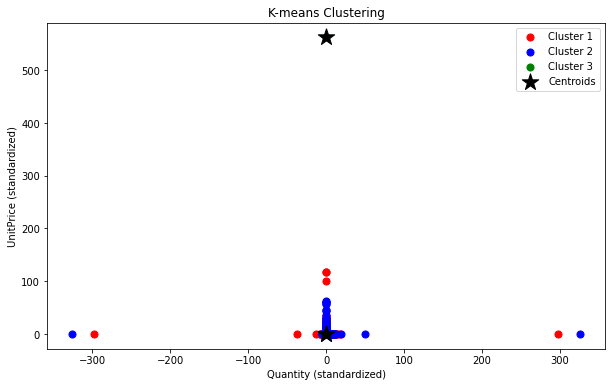

In [ ]:
#Visualize the clustered data
fig, ax = plt.subplots(figsize=(10, 6))

#Plot data points colored by cluster
ax.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s=50, c='red', label='Cluster 1')
ax.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s=50, c='blue', label='Cluster 2')
ax.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s=50, c='green', label='Cluster 3')

#Plot centroids with markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='*', c='black', label='Centroids')

#Set plot title and labels
ax.set_title('K-means Clustering')
ax.set_xlabel('Quantity (standardized)')
ax.set_ylabel('UnitPrice (standardized)')

#Add legend
ax.legend()

#Show the plot
plt.show()

#Determining the K- Value

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

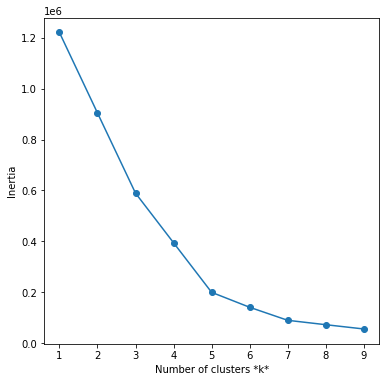

In [ ]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

#Initializing the K- Value

In [ ]:
# Create a k-means clustering model with k=5 clusters
kmeans = KMeans(n_clusters=5)
# Fit the model to the standardized data
kmeans.fit(X_scaled)
# Get the cluster assignments for each data point
labels = kmeans.labels_
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the Clusters

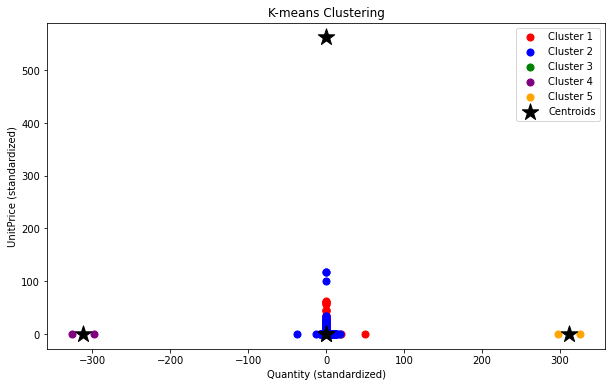

In [ ]:
# Visualize the clustered data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points colored by cluster
ax.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s=50, c='red', label='Cluster 1')
ax.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s=50, c='blue', label='Cluster 2')
ax.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s=50, c='green', label='Cluster 3')
ax.scatter(X_scaled[labels == 3, 0], X_scaled[labels == 3, 1], s=50, c='purple', label='Cluster 4')
ax.scatter(X_scaled[labels == 4, 0], X_scaled[labels == 4, 1], s=50, c='orange', label='Cluster 5')

# Plot centroids with markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='*', c='black', label='Centroids')

# Set plot title and labels
ax.set_title('K-means Clustering')
ax.set_xlabel('Quantity (standardized)')
ax.set_ylabel('UnitPrice (standardized)')

# Add legend
ax.legend()

# Show the plot
plt.show()


#Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)

# Print the silhouette score
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.6437435254638915


At first, I have imported nesscessary packages,then loaded the dataset then I performed exploratory data analysis for better understanding each of dataset associated with Customer Segmentation.

Next, I pre-processed the data then did normalization. Then initialized K-mean model and visualized the clusters.

For determining the value of K, we used Elbow plot to find the value of K.Then we initialized the K value to the model. The Silhouette Score of this model is 64%.


Hereby I explored the dataset and pre-processed the data, then i trained K-means model.

Thank you.